In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

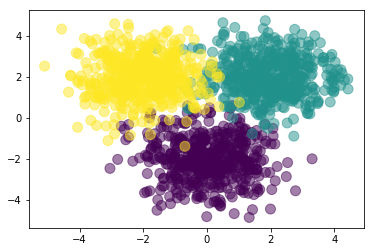

In [3]:
# create random training data again
Nclass = 500
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes

X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3]).astype(np.float32)

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, alpha=0.5)

In [4]:
N = len(Y)
# turn Y into an indicator matrix for training
T = np.zeros((N, K))
for i in range(N):
    T[i, Y[i]] = 1

In [5]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

In [6]:
def forward(X, W1, b1, W2, b2):
    Z = tf.nn.sigmoid(tf.matmul(X, W1) + b1)
    return tf.matmul(Z, W2) + b2

In [7]:
tf_X = tf.placeholder(tf.float32, [None, D])
tf_Y = tf.placeholder(tf.float32, [None, K])

In [8]:
W1 = init_weights([D, M])
b1 = init_weights([M])
W2 = init_weights([M, K])
b2 = init_weights([K])

In [9]:
logits = forward(X, W1, b1, W2, b2)

In [10]:
# WARNING: This op expects unscaled logits,
# since it performs a softmax on logits
# internally for efficiency.
# Do not call this op with the output of softmax,
# as it will produce incorrect results.
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=tf_Y, logits=logits)
)

In [11]:
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost)
predict_op = tf.argmax(logits, 1)

In [14]:
init = tf.global_variables_initializer()
sess.run(init)

In [15]:
for i in range(1000):
    sess.run(train_op, feed_dict={tf_X: X, tf_Y: T})
    pred = sess.run(predict_op, feed_dict={tf_X: X, tf_Y: T})
    if i % 100 == 0:
        print("Accuracy", np.mean(Y == pred))

Accuracy 0.3333333333333333
Accuracy 0.3333333333333333
Accuracy 0.3333333333333333
Accuracy 0.5693333333333334
Accuracy 0.8753333333333333
Accuracy 0.9506666666666667
Accuracy 0.9486666666666667
Accuracy 0.9486666666666667
Accuracy 0.9513333333333334
Accuracy 0.952
